# Project 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Data/young-people-survey-responses.csv')
print(data.head(5))

   Unnamed: 0  Music  Techno  Movies  History  Mathematics  Pets  Spiders  \
0           0    5.0     1.0     5.0      1.0          3.0   4.0      1.0   
1           1    4.0     1.0     5.0      1.0          5.0   5.0      1.0   
2           2    5.0     1.0     5.0      1.0          5.0   5.0      1.0   
3           3    5.0     2.0     5.0      4.0          4.0   1.0      5.0   
4           4    5.0     2.0     5.0      3.0          2.0   1.0      1.0   

   Loneliness  Parents' advice   Internet usage  Finances   Age  Siblings  \
0         3.0              4.0  few hours a day       3.0  20.0       1.0   
1         2.0              2.0  few hours a day       3.0  19.0       2.0   
2         5.0              3.0  few hours a day       2.0  20.0       2.0   
3         5.0              2.0  most of the day       2.0  22.0       1.0   
4         3.0              3.0  few hours a day       4.0  20.0       1.0   

   Gender Village - town  
0  female        village  
1  female           

In [3]:
print(data.describe())
print("\n median music", data['Music'].median())
print("\n median techno", data['Techno'].median())


        Unnamed: 0        Music       Techno       Movies      History  \
count  1010.000000  1007.000000  1003.000000  1004.000000  1008.000000   
mean    504.500000     4.731877     2.338983     4.613546     3.207341   
std     291.706188     0.664049     1.324099     0.694700     1.263523   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%     252.250000     5.000000     1.000000     4.000000     2.000000   
50%     504.500000     5.000000     2.000000     5.000000     3.000000   
75%     756.750000     5.000000     3.000000     5.000000     4.000000   
max    1009.000000     5.000000     5.000000     5.000000     5.000000   

       Mathematics        Pets      Spiders   Loneliness  Parents' advice  \
count  1007.000000  1006.00000  1005.000000  1009.000000      1008.000000   
mean      2.334657     3.33499     2.825871     2.887017         3.265873   
std       1.352496     1.54537     1.543695     1.131757         0.865736   
min       1.000000     1.

In [4]:
print(data.isna().sum())

Unnamed: 0         0
Music              3
Techno             7
Movies             6
History            2
Mathematics        3
Pets               4
Spiders            5
Loneliness         1
Parents' advice    2
Internet usage     0
Finances           3
Age                7
Siblings           6
Gender             6
Village - town     4
dtype: int64


<Axes: >

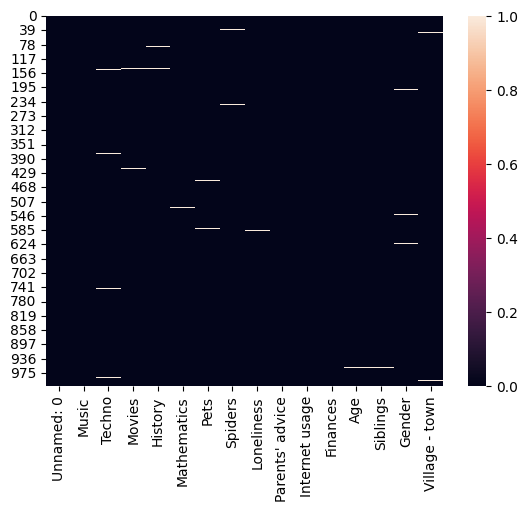

In [5]:
sns.heatmap(data.isna())

## Drop Variables that are not necessary

In [6]:
# we can drop loneliness because that is the variable we are trying to guess

y = data["Loneliness"]
data.drop('Loneliness', axis=1, inplace=True )

## Missing Values


In [7]:
percent_missing_vals = data.agg(lambda x: x.isna().mean() * 100)

print(percent_missing_vals)
# None are over 10 percent

Unnamed: 0         0.000000
Music              0.297030
Techno             0.693069
Movies             0.594059
History            0.198020
Mathematics        0.297030
Pets               0.396040
Spiders            0.495050
Parents' advice    0.198020
Internet usage     0.000000
Finances           0.297030
Age                0.693069
Siblings           0.594059
Gender             0.594059
Village - town     0.396040
dtype: float64


In [8]:
# fewer than 10%, fill with min, max, mean or median.
def fill_avg(x,col):
    x[col].replace(np.nan, x[col].mean(), inplace=True)
    return x


def fill_mode(x, col):
    x[col].replace(np.nan, x[col].mode(), inplace=True)
    
def fill_median(x, col):
    x[col].replace(np.nan, x[col].median(), inplace=True)



C:\Users\shust\AppData\Local\Temp\ipykernel_44328\3157719252.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[col].replace(np.nan, x[col].median(), inplace=True)
C:\Users\shust\AppData\Local\Temp\ipykernel_44328\3157719252.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



<Axes: >

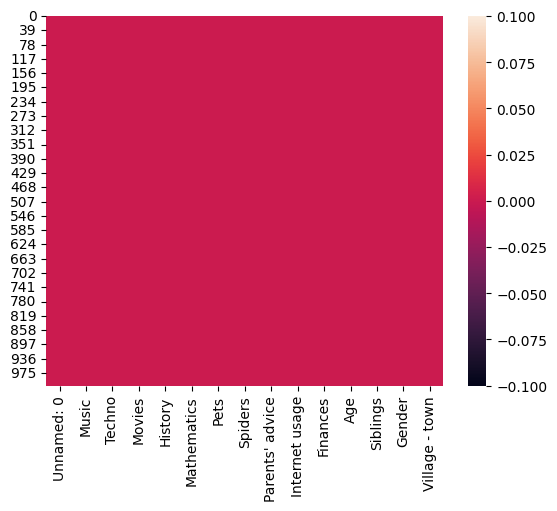

In [9]:
# fill with median since they are ordinal values.
# we don't want 2.45 on a scale of 1-5
fill_median(data, col='Techno')
fill_median(data, col='Movies')
fill_median(data, col='Music')
fill_median(data, col="History")
fill_median(data, col='Mathematics')
fill_median(data, col='Pets')
fill_median(data, col='Spiders')
fill_median(data, col="Siblings")
fill_median(data, col="Parents' advice")
fill_median(data, col="Finances")



fill_avg(data, col="Age")

data['Gender'].replace(np.nan, data['Gender'].mode()[0], inplace=True)
data['Village - town'].replace(np.nan, data['Village - town'].mode()[0], inplace=True)

sns.heatmap(data.isna())



In [10]:
print(data.isna().sum())

Unnamed: 0         0
Music              0
Techno             0
Movies             0
History            0
Mathematics        0
Pets               0
Spiders            0
Parents' advice    0
Internet usage     0
Finances           0
Age                0
Siblings           0
Gender             0
Village - town     0
dtype: int64


In [11]:
display(data)

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,few hours a day,4.0,20.0,1.0,female,village
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1005,5.0,3.0,5.0,4.0,1.0,4.0,2.0,4.0,few hours a day,3.0,20.0,1.0,female,city
1006,1006,4.0,4.0,5.0,4.0,5.0,5.0,1.0,4.0,less than an hour a day,3.0,27.0,5.0,male,village
1007,1007,4.0,1.0,4.0,2.0,3.0,5.0,2.0,4.0,most of the day,1.0,18.0,0.0,female,city
1008,1008,5.0,2.0,5.0,3.0,1.0,4.0,3.0,3.0,most of the day,3.0,25.0,1.0,female,city


## Encode Categorical Variables

In [12]:
# categorical variables: 'Gender', 'Internet Usage', 'village - town'

data = data.join(pd.get_dummies(data['Gender'], dtype=int)).drop('Gender', axis=1)
data = data.join(pd.get_dummies(data['Village - town'], dtype=int)).drop('Village - town', axis=1)


In [13]:

display(data)

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Parents' advice,Internet usage,Finances,Age,Siblings,female,male,city,village
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,4.0,few hours a day,3.0,20.0,1.0,1,0,0,1
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,few hours a day,3.0,19.0,2.0,1,0,1,0
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,3.0,few hours a day,2.0,20.0,2.0,1,0,1,0
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,2.0,most of the day,2.0,22.0,1.0,1,0,1,0
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,few hours a day,4.0,20.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1005,5.0,3.0,5.0,4.0,1.0,4.0,2.0,4.0,few hours a day,3.0,20.0,1.0,1,0,1,0
1006,1006,4.0,4.0,5.0,4.0,5.0,5.0,1.0,4.0,less than an hour a day,3.0,27.0,5.0,0,1,0,1
1007,1007,4.0,1.0,4.0,2.0,3.0,5.0,2.0,4.0,most of the day,1.0,18.0,0.0,1,0,1,0
1008,1008,5.0,2.0,5.0,3.0,1.0,4.0,3.0,3.0,most of the day,3.0,25.0,1.0,1,0,1,0


In [14]:
print(data['Internet usage'].unique())

['few hours a day' 'most of the day' 'less than an hour a day'
 'no time at all']


In [15]:
# map Internet usage from low to high
def ordinal_encode(x,col):
    order = {
        'no time at all':0,
        np.nan:0,
        'less than an hour a day':1,
        'few hours a day':2,
        'most of the day':3
    }
    x[col] = x[col].map(order)
    return x

In [16]:
data = ordinal_encode(data, col="Internet usage")

In [17]:
display(data)

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Parents' advice,Internet usage,Finances,Age,Siblings,female,male,city,village
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,4.0,2,3.0,20.0,1.0,1,0,0,1
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2,3.0,19.0,2.0,1,0,1,0
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,3.0,2,2.0,20.0,2.0,1,0,1,0
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,2.0,3,2.0,22.0,1.0,1,0,1,0
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,2,4.0,20.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1005,5.0,3.0,5.0,4.0,1.0,4.0,2.0,4.0,2,3.0,20.0,1.0,1,0,1,0
1006,1006,4.0,4.0,5.0,4.0,5.0,5.0,1.0,4.0,1,3.0,27.0,5.0,0,1,0,1
1007,1007,4.0,1.0,4.0,2.0,3.0,5.0,2.0,4.0,3,1.0,18.0,0.0,1,0,1,0
1008,1008,5.0,2.0,5.0,3.0,1.0,4.0,3.0,3.0,3,3.0,25.0,1.0,1,0,1,0


## Divide into Training and Testing Groups

In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)


## Scaling

Because most of them are on a scale of 1-5, I will standardize them to be between -1 and 1

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
